In [54]:
#Fst analysis of 2021 orchard data 

In [1]:
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")
setwd('/scratch/groups/dpetrov/MarkB/Orchard2021Data/FST/')


# Analysis/plotting of Fst results

In [5]:
#Time points vs. baseline
df = read.csv('./Meta_ECage_Fst_orch2021.csv')
df.base = df %>%
    filter(type %in% c("tech.rep", "biol.rep", "Base.TP")) %>%
    mutate(time.seg = case_when(
        time.seg == 'tech.rep' ~ 'Technical Reps.'  , 
        time.seg == 'biol.rep' ~ 'Biological Reps.',
        time.seg == '0_1' ~ 'Base vs. Tpt. 1', 
        time.seg == '0_2' ~ 'Base vs. Tpt. 2', 
        time.seg == '0_3' ~ 'Base vs. Tpt. 3', 
        time.seg == '0_4' ~ 'Base vs. Tpt. 4', 
        time.seg == '0_5' ~ 'Base vs. Tpt. 5', 
        time.seg == '0_6' ~ 'Base vs. Tpt. 6', 
        time.seg == '0_7' ~ 'Base vs. Tpt. 7', 
        time.seg == '0_8' ~ 'Base vs. Tpt. 8', 
        time.seg == '0_9' ~ 'Base vs. Tpt. 9', 
        time.seg == '0_10' ~ 'Base vs. Tpt. 10', 
        time.seg == '0_11' ~ 'Base vs. Tpt. 11', 
        time.seg == '0_12' ~ 'Base vs. Tpt. 12', 
                               ))

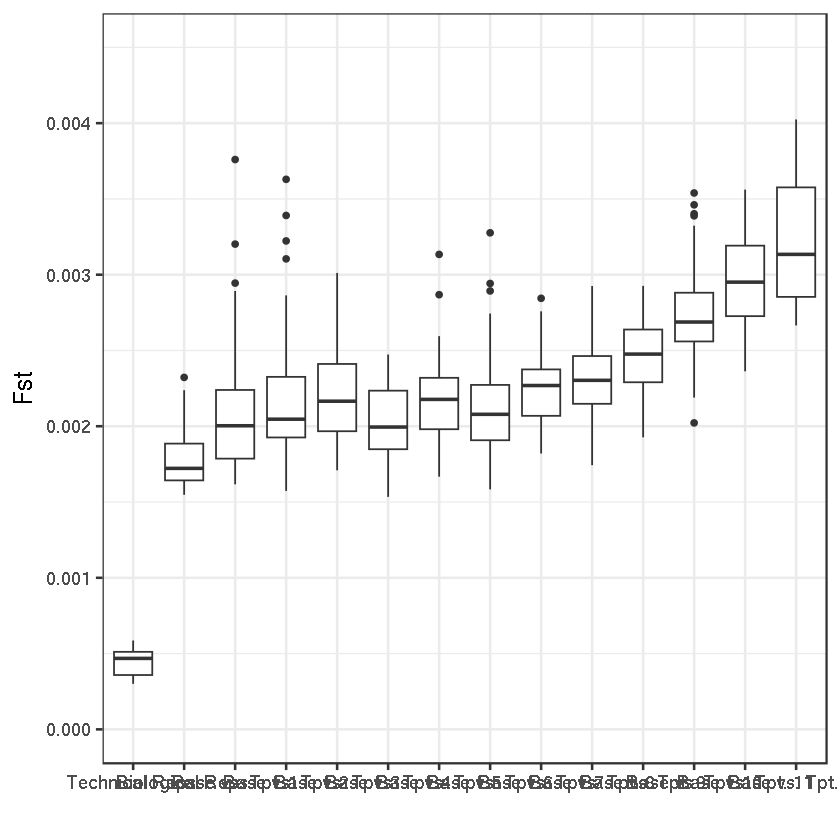

In [7]:
p.base = ggplot(df.base, aes(x = time.seg, y = fst)) + 
    geom_boxplot() +
    scale_x_discrete(limits = c('Technical Reps.', 'Biological Reps.', 'Base vs. Tpt. 1', 'Base vs. Tpt. 2' ,'Base vs. Tpt. 3',   
                                'Base vs. Tpt. 4',  'Base vs. Tpt. 5',  'Base vs. Tpt. 6',  'Base vs. Tpt. 7',  
                                'Base vs. Tpt. 8',  'Base vs. Tpt. 9', 'Base vs. Tpt. 10', 'Base vs. Tpt. 11', 'Base vs. Tpt. 12')) +
    theme_bw(base_size = 16) +
    ylim(0, 0.0045) +
    xlab("") +
    ylab("Fst") 
   # geom_signif(comparisons = list(c("Sequencing Reps.", "Cage Reps."), c("Cage Reps.", "Base vs. Tpt. 1"),
    #                               c("Cage Reps.", "Base vs. Tpt. 2"),  c("Cage Reps.", "Base vs. Tpt. 3"),
     #                              c("Cage Reps.", "Base vs. Tpt. 4"),  c("Cage Reps.", "Base vs. Tpt. 5"),
     #                              c("Cage Reps.", "Base vs. Tpt. 6"),  c("Cage Reps.", "Base vs. Tpt. 7"),
    #                               c("Cage Reps.", "Base vs. Tpt. 8"),  c("Cage Reps.", "Base vs. Tpt. 9"),
      #                             c("Cage Reps.", "Base vs. Tpt. 10"), c("Cage Reps.", "Base vs. Tpt. 11")
       #                           ), 
         #     map_signif_level=TRUE, test = 't.test')
p.base
ggsave(filename = "../Figures/Fst/base.fst.ecage.pdf", p.base, width = 20, height = 7)


# Statistics

In [15]:
#####Stats on biol. vs. tech reps; biol reps vs. each base vs. tp
df = read.csv('./Meta_ECage_Fst_orch2021.csv')
##biol vs. tech. reps
df.reps = df %>% filter(type %in% c('biol.rep', 'tech.rep'))
df.reps.stats = data.frame()
comp = "Reps"
pval = t.test((df.reps %>% filter(type == 'tech.rep'))$fst, (df.reps %>% filter(type == 'biol.rep'))$fst)$p.value
d = cbind(comp, pval)
df.reps.stats = rbind(df.reps.stats, d)



df.tps = df %>% filter(type == 'Base.TP')
df.tps.stats = data.frame()
for (tp in as.character(unique((df.tps %>% filter(type == "Base.TP"))$time.seg))){
    comp = paste0('Biol.Rep vs ', tp)
    df.reps = df %>% filter(type == 'biol.rep')
    df.comp = df.tps %>% filter(time.seg == tp)
    pval = t.test(df.comp$fst, df.reps$fst)$p.value
    d = cbind(comp, pval)
    df.tps.stats = rbind(df.tps.stats, d)
}


df.tps = df %>% filter(type == 'Base.TP')
df.tps.tech.stats = data.frame()
for (tp in as.character(unique((df.tps %>% filter(type == "Base.TP"))$time.seg))){
    comp = paste0('Tech.Rep vs ', tp)
    df.reps = df %>% filter(type == 'tech.rep')
    df.comp = df.tps %>% filter(time.seg == tp)
    pval = t.test(df.comp$fst, df.reps$fst, alternative = 'greater')$p.value
    d = cbind(comp, pval)
    df.tps.tech.stats = rbind(df.tps.tech.stats, d)
}



df.stats = rbind(df.reps.stats, df.tps.stats, df.tps.tech.stats)
write.csv(df.stats, 'fst.stats.ecage.orch21.csv', row.names = FALSE)

df.stats = df.stats %>% mutate(pval = as.numeric(as.character(pval)))
dim(df.stats)
dim(df.stats %>% filter(pval < 0.01)) ###All comparisons significant (tech reps vs. base -> tp and biol reps vs. base ->tp)



[1] 25  2

[1] 25  2

In [14]:
#Does Fst change as a funciton of time? 
##here use glm with logistic link function
df = read.csv('./Meta_ECage_Fst_orch2021.csv')
df = df %>% filter(type == 'Base.TP')
df = df %>% separate(time.seg, into = c(NA, "tpt"), sep = "_") %>%
    mutate(tpt = as.numeric(tpt))
glm(fst ~ tpt, family = gaussian(link = 'logit'), data = df)

###pval = 0.039


Call:  glm(formula = fst ~ tpt, family = gaussian(link = "logit"), data = df)

Coefficients:
(Intercept)          tpt  
   -6.29965      0.03947  

Degrees of Freedom: 555 Total (i.e. Null);  554 Residual
Null Deviance:	    0.0001287 
Residual Deviance: 7.628e-05 	AIC: -7202

In [16]:
#Does Fst change as a funciton of time? - use linear mixed effects model 
####-- RUN ON LOCAL COMPUTER B/C lme4 incompatible with cluster version of R
df = read.csv('./Meta_ECage_Fst_orch2021.csv')
df = df %>% filter(type == 'Base.TP')
df = df %>% separate(time.seg, into = c(NA, "tpt"), sep = "_") %>%
    mutate(tpt = as.numeric(tpt))
#mod.full = lmer(fst ~ tpt + (1|cage), data = df, REML = FALSE)
#mod.null = lmer(fst ~  (1|cage), data = df, REML = FALSE)
#anova(mod.full, mod.null)[2,8]

###pval < 0.001

,cage,fst,tpt,type
,<fct>,<dbl>,<dbl>,<fct>
1,tp1_F1_E1_downsamped,0.002769937,1,Base.TP
2,tp1_F1_E10_downsamped,0.002562860,1,Base.TP
3,tp1_F1_E11_downsamped,0.002205998,1,Base.TP
4,tp1_F1_E12_downsamped,0.002784526,1,Base.TP
5,tp1_F1_E2_downsamped,0.001937727,1,Base.TP
6,tp1_F1_E4_downsamped,0.001681600,1,Base.TP


# Code for generating Fst data files

In [ ]:
###Fst between biological replicates - run on cluster BiolReps_ECage_Fst.R
setwd('/scratch/groups/dpetrov/MarkB/Orchard2021Data/RData/Downsampled/')
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")

load('./orch2021_Downsampled_BiolReps_ECages.RData')
rep.samps = unique(samps$sample)


data = data.frame()
for (samp in rep.samps){
    load('./orch2021_Downsampled_BiolReps_ECages.RData')
    df = cbind(samps, t(afmat))
    df = df %>%
        filter(sample == samp)
    df = df[,-(1:ncol(samps))]
    df = t(df)
    rep = samp
    fst.mat = Fst.mat(df)
    fst.val = fst.mat[1, 2]
    fst.df = cbind(rep, fst.val)
    fst.df = fst.df %>% as.data.frame(fst.df) %>%
                rename(fst = fst.val, cage = rep) %>%
                mutate(type = "biol.rep") %>%
                mutate(time.seg = "biol.rep") %>%
                dplyr::select(cage, fst, time.seg, type)
    data = rbind(data, fst.df)
}


write.csv(data, "../../FST/BiolReps_ECage_Fst_orch2021.csv", row.names = FALSE

In [ ]:
###Fst between E Cage technical replicates - run on cluster TechReps_ECages_Fst.R
setwd('/scratch/groups/dpetrov/MarkB/Orchard2021Data/RData/Downsampled/')
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")

load('./orch2021_Downsampled_TechReps_ECages.RData')
rep.samps = unique(samps$sample)

data = data.frame()
for (samp in rep.samps){
    load('./orch2021_Downsampled_TechReps_ECages.RData')
    df = cbind(samps, t(afmat))
    df = df %>%
        filter(sample == samp)
    df = df[,-(1:ncol(samps))]
    df = t(df)
    rep = samp
    fst.mat = Fst.mat(df)
    fst.val = fst.mat[1, 2]
    fst.df = cbind(rep, fst.val)
    fst.df = fst.df %>% as.data.frame(fst.df) %>%
                rename(fst = fst.val, cage = rep) %>%
                mutate(type = "tech.rep") %>%
                mutate(time.seg = "tech.rep") %>%
                dplyr::select(cage, fst, time.seg, type)
    data = rbind(data, fst.df)
}


write.csv(data,"../../FST/TechReps_ECage_Fst_orch2021.csv", row.names = FALSE)

In [2]:
##Getting baseline vs. Ecage

setwd('/scratch/groups/dpetrov/MarkB/Orchard2021Data/RData/Downsampled/')
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")

TP = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


data = data.frame()

for (tp in TP){
    load('./orch2021_Downsampled_ECage_Filtered_SUB.RData')
    df = cbind(samps, t(afmat))
    df = df %>%
    filter(tpt == tp)
    df = df[,-(1:ncol(samps))]
    df = t(df)
    load('./orch2021_Baseline_Downsampled_Filtered_SUB.RData')
    df.fst = cbind(afmat.base, df)
    fst.mat = Fst.mat(df.fst)
    fst.mat = (fst.mat[-c(5:nrow(fst.mat)),-c(1:4)])
    fst.vec = as.vector(fst.mat)
    cages = colnames(df)
    time.seg = paste0("0_", tp)
    type = 'Base.TP'
    fst.df = as.data.frame(fst.vec)
    fst.df$cage = rep(cages, 4)
    fst.df$time.seg = time.seg
    fst.df$type = type
    fst.df = fst.df %>%
        rename(fst = fst.vec) %>%
        dplyr::select(cage, fst, time.seg, type)
    data = rbind(data, fst.df)

}
write.csv(data, '../../FST/BaselineTP_Fst_ECage_Orch2021.csv', row.names = FALSE)

In [ ]:
##Getting baseline vs. Ecage  -- BY CHROM -- run on cluster Baseline_Fst_ByChrom.R
setwd('/scratch/groups/dpetrov/MarkB/Orchard2021Data/RData/Downsampled/')
source("/home/users/mcbitter/OrchardProject/Code/config.R")
source("/home/users/mcbitter/OrchardProject/Code/general_cage_functions.R")



chroms = c('2L', '2R', '3L', '3R', 'X')
TP = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

data.meta = data.frame()
for (chr in chroms){
    data.chrom = data.frame()
    for (tp in TP){
        load('./orch2021_Downsampled_ECage_Filtered.RData')
        d = cbind(sites, afmat)
        d = d %>% filter(chrom == chr)
        afmat = d %>% dplyr::select(-chrom, -pos)
        df = cbind(samps, t(afmat))
        df = df %>% filter(tpt == tp)
        df = df[,-(1:ncol(samps))]
        df = t(df)
        load('./orch2021_Baseline_Downsampled_Filtered.RData')
        afmat.base = cbind(sites.base, afmat.base)
        afmat.base = afmat.base %>% filter(chrom == chr) %>% dplyr::select(-chrom, -pos)
        df.fst = cbind(afmat.base, df)
        fst.mat = Fst.mat(df.fst)
        fst.mat = (fst.mat[-c(5:nrow(fst.mat)),-c(1:4)])
        fst.vec = as.vector(fst.mat)
        cages = colnames(df)
        time.seg = paste0("0_", tp)
        type = 'Base.TP'
        fst.df = as.data.frame(fst.vec)
        fst.df$cage = rep(cages, 4)
        fst.df$time.seg = time.seg
        fst.df$type = type
        fst.df = fst.df %>%
            rename(fst = fst.vec) %>%
            dplyr::select(cage, fst, time.seg, type)
        fst.df$chrom = chr
        data.chrom = rbind(data.chrom, fst.df)
    }
    data.meta = rbind(data.meta, data.chrom)
    }
data.meta
write.csv(data, '../../FST/BaselineTP_Fst_ByChrom_ECage_Orch2021.csv', row.names = FALSE)

# Data Wrangling/Concatenating Output (of files used above)




In [2]:
setwd('/scratch/groups/dpetrov/MarkB/Orchard2021Data/FST/')

In [5]:
##Base + reps
base = read.csv("./BaselineTP_Fst_ECage_Orch2021.csv")
bio.reps = read.csv('./BiolReps_ECage_Fst_orch2021.csv')
tech.reps = read.csv('./TechReps_ECage_Fst_orch2021.csv')

In [6]:
meta.fst = rbind(base, bio.reps, tech.reps) 
write.csv(meta.fst, "./Meta_ECage_Fst_orch2021.csv", row.names = FALSE)